In [1]:
from matplotlib import pyplot as plt
import numpy as np

from sigproc_kit import *

from my_utils import *

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [3]:
t = np.arange(0.,4e-9,2.5e-12)

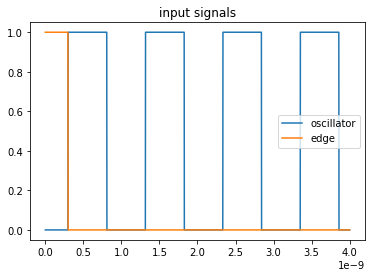

In [4]:
osc_freq=983.56e6

hit_time = 300e-12 

edge = t < hit_time

#osc  = sqwave(2*np.pi*(t-hit_time)*osc_freq)>0

duty_cycle = 0.5

asym_thr = 1-2*duty_cycle

osc = invrampwave(2*np.pi*(t-hit_time)*osc_freq) > asym_thr

plt.plot(t,osc,label="oscillator")
plt.plot(t,edge,label="edge")
plt.legend()
plt.title("input signals")
plt.show()

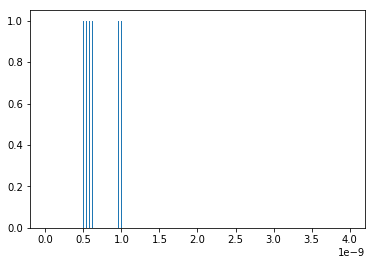

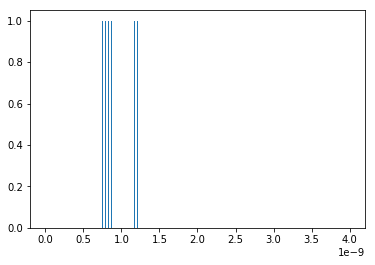

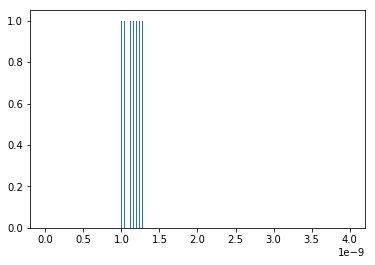

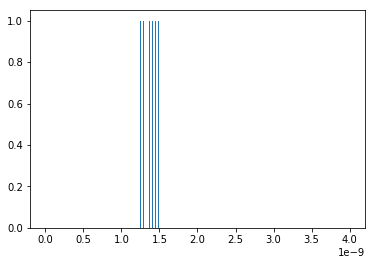

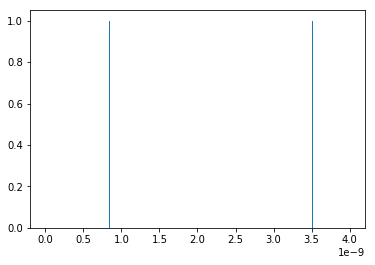

In [5]:

# window width 500p
# offset 250p
tdl_points_I = np.arange(0.5e-9,1e-9,20e-12)
Q_offset = 0.25e-9
#Q_offset = 0.35e-9
tdl_points_Q = np.arange(Q_offset+0.5e-9,Q_offset+1e-9,20e-12)

tdl_points_Ib = np.arange(1e-9,1.5e-9,20e-12)
Q_offset = 0.25e-9
#Q_offset = 0.35e-9
tdl_points_Qb = np.arange(Q_offset+1.0e-9,Q_offset+1.5e-9,20e-12)

inter_sigma = 0e-12
tdl_points_intermediate = np.linspace(0,4e-9,10) + 4e-9/10
tdl_points_intermediate += inter_sigma*np.random.randn(len(tdl_points_intermediate))

tdl_hist_I = plt.hist(tdl_points_I,bins=t)
plt.show()
tdl_hist_Q = plt.hist(tdl_points_Q,bins=t)
plt.show()
tdl_hist_Ib = plt.hist(tdl_points_Ib,bins=t)
plt.show()
tdl_hist_Qb = plt.hist(tdl_points_Qb,bins=t)
plt.show()
tdl_hist_intermediate = plt.hist(tdl_points_intermediate,bins=t)
plt.show()

I_loc = np.append(tdl_hist_I[0],[0])
Q_loc = np.append(tdl_hist_Q[0],[0])
Ib_loc = np.append(tdl_hist_Ib[0],[0])
Qb_loc = np.append(tdl_hist_Qb[0],[0])
intermediate_loc = np.append(tdl_hist_intermediate[0],[0])

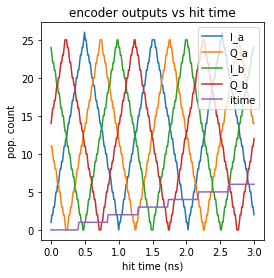

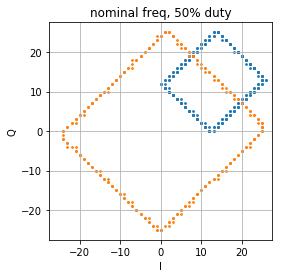

In [143]:
Ia = np.array([])
Qa = np.array([])
Ib = np.array([])
Qb = np.array([])
itime = np.array([])

hit_time = np.linspace(0,3e-9,250)

for ht in hit_time:
    #osc = sqwave(2*np.pi*(t-ht)*osc_freq) >0
    osc = invrampwave(2*np.pi*(t-ht)*osc_freq) > asym_thr
    edge = t < ht
    Ia = np.append(Ia,[np.dot(I_loc,osc)])
    Qa = np.append(Qa,[np.dot(Q_loc,osc)])
    Ib = np.append(Ib,[np.dot(Ib_loc,osc)])
    Qb = np.append(Qb,[np.dot(Qb_loc,osc)])
    itime = np.append(itime,[np.dot(intermediate_loc,edge)])
    
#I -= np.sum(I_loc)/2
#Q -= np.sum(Q_loc)/2

plt.plot(hit_time*1e9,Ia    ,label="I_a")
plt.plot(hit_time*1e9,Qa    ,label="Q_a")
plt.plot(hit_time*1e9,Ib    ,label="I_b")
plt.plot(hit_time*1e9,Qb    ,label="Q_b")
plt.plot(hit_time*1e9,itime,label="itime")

plt.xlabel("hit time (ns)")
plt.ylabel("pop. count")
plt.title("encoder outputs vs hit time")
plt.legend()

plt.savefig("IQ_wfm.svg")
plt.show()


plt.rcParams["figure.figsize"] = (4,4)

plt.grid(True)
plt.scatter(Ia,Qa,s=3)
plt.xlabel("I")
plt.ylabel("Q")
plt.title("IQ trajectory")
#plt.savefig("IQ_plane.svg")
#plt.show()

plt.scatter(Ia-Ib,Qa-Qb,s=3)
plt.title("nominal freq, 50% duty")

val=27.5
plt.xlim([-val,val])
plt.ylim([-val,val])
plt.savefig("IQ_plane.svg")
plt.savefig("IQ_plane_perfect.svg")
plt.show()

# center for the atan

#I -= (np.max(I)+np.min(I))/2
#Q -= (np.max(Q)+np.min(Q))/2
    
I = Ia-Ib
Q = Qa-Qb

In [7]:
#%matplotlib notebook

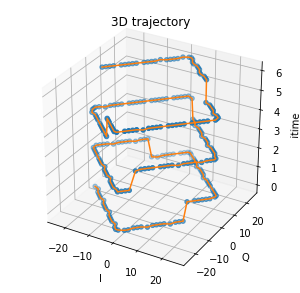

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate random data for the 3D scatter plot
x = I
y = Q
z = itime

# Create a figure and a 3D axis
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
ax.plot(x, y, z, c=colors[1])  
ax.scatter(x, y, z, c=colors[0], marker='o')  

# Set labels
ax.set_title("3D trajectory")
ax.set_xlabel('I')
ax.set_ylabel('Q')
ax.set_zlabel('itime')

plt.savefig("IQ_spiral.svg")

# Show the plot
plt.show()

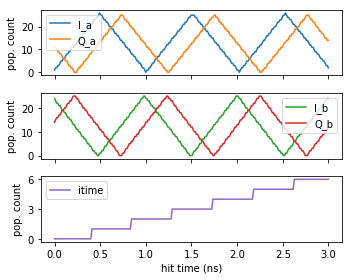

In [9]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure with 2 stacked subplots sharing the x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 4), sharex=True)

#ax1.set_title("Quadrature Pair a")
ax1.plot(hit_time*1e9,Ia    ,label="I_a")
ax1.plot(hit_time*1e9,Qa    ,label="Q_a")
ax1.set_ylabel('pop. count')
ax1.legend()

# Plot on the second subplot
#ax1.set_title("Quadrature Pair b")
ax2.plot(hit_time*1e9,Ib    ,label="I_b", color=colors[2])
ax2.plot(hit_time*1e9,Qb    ,label="Q_b", color=colors[3])
ax2.set_ylabel('pop. count')
ax2.legend()

ax3.plot(hit_time*1e9,itime,label="itime", color=colors[4])
ax3.set_ylabel('pop. count')
ax3.set_xlabel('hit time (ns)')
ax3.set_yticks([0,3,6])
ax3.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.savefig("IQab_itime.svg")
plt.show()

In [84]:

# Function to format ticks as multiples of π
def format_ticks(val, pos):
    if val == 0:
        return '0'
    elif val == 0.5:
        return 'π/2'
    elif val == -0.5:
        return '-π/2'
    elif val == 1:
        return 'π'
    elif val == -1:
        return '-π'
    elif val == 2 * np.pi:
        return '2π'
    elif val == -2 * np.pi:
        return '-2π'
    else:
        return f'{val/np.pi:.0f}π'





def ana_rot(I,Q,itime,**kwargs):

    plt.rcParams["figure.figsize"] = (5,4)
    fig, ax = plt.subplots()
    # Set major ticks at multiples of π/2
    ax.xaxis.set_major_locator(MultipleLocator(base=0.5))
    # Apply the formatting function
    ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))
    ax.grid(True)

    
    phi = np.arctan2(Q,I)
    
    rotations   = np.array([])
    gap_centers = np.array([])


    plot = kwargs.get("plot",False)
    
    last_gap_center = 0
    rotation = 0
    
    my_range = int(np.max(itime))+1
    
    last_start_of_block = -1000
    last_end_of_block   = -1000
    last_block_center   = -1000
    last_block_over_gap      = False
    

    for i in range(my_range):
        mask = (itime == i)
        phiset=phi[mask]
        
        
            
        gap_center = 0
            
        if len(phiset) > 0:
        
            phiset.sort()
            
            rot_phiset = np.concatenate((phiset[1:],phiset[:1])) 
            
            distance = (rot_phiset - phiset) % (2*np.pi)
            
            end_of_block = phiset[np.argmax(distance)]
            start_of_block = phiset[ (np.argmax(distance)+1) % len(phiset) ]
            max_distance  = np.max(distance)
            block_width   = 2*np.pi - max_distance
            gap_center = ((end_of_block + max_distance/2 + np.pi) % (2*np.pi)) - np.pi
            block_center = ((start_of_block + block_width/2 + np.pi) % (2*np.pi)) - np.pi
            #plt.plot(distance)
            #plt.show()
            if(0):
                print("gap distance: {}".format(max_distance))
                print("start of block: {}".format(start_of_block))
                print("end of block: {}".format(end_of_block))
                print("gap center: {}".format(gap_center))
                print("block center: {}".format(block_center))
            
            block_over_gap = block_center > gap_center
            
            #if (last_block_over_gap == False) and (block_over_gap == True):
                #rotation += 1
            if gap_center < last_gap_center:
                rotation += 1
                
            #print("counted rotations: {}".format(rotation))
            
            last_gap_center     = gap_center
            last_start_of_block = start_of_block
            last_end_of_block   = end_of_block
            last_block_center   = block_center
            last_block_over_gap = block_over_gap
            
        gap_centers = np.append(gap_centers,[gap_center])
        rotations   = np.append(rotations,[rotation])
        
        
        if(plot):
            print("i = {}".format(i))

            #ax.hist(phiset/np.pi,bins=np.arange(-1,1,.025))
            
            ax.scatter( 
                phiset/np.pi,
                np.zeros(len(phiset)) + i + 0.25*(np.random.random(len(phiset))-0.5),
                s=6,
                c=colors[i]
            )
            
            marker_size=150
            ax.scatter( 
                [gap_center/np.pi],
                [i],
                s=marker_size,
                c=colors[i],
                marker="x"
            )
            
            marker_size=300
            ax.scatter( 
                [start_of_block/np.pi],
                [i],
                s=marker_size,
                c=colors[i],
                marker="|"
            )
            ax.scatter( 
                [end_of_block/np.pi],
                [i],
                s=marker_size,
                c=colors[i],
                marker="|"
            )
            
            
            #ax.set_yticks(list(range(5)))
            
            ax.set_xticks([-1,-0.5,0,0.5,1])
            
            #plt.show()
    
    plt.savefig("gap_centers.svg")
    plt.show()
        
    #print(gap_centers)
   
    if(True):
        idx = list(range(my_range))
        plt.plot(idx,rotations)
        plt.scatter(idx,rotations,label="rotations")
        plt.plot(idx,gap_centers)
        plt.scatter(idx,gap_centers,label="gap centers")
        plt.title("unfolding analysis")
        plt.legend()
        plt.xlabel("intermediate time")
        plt.show()
        
    return (rotations,gap_centers)

def cont_phi_new(I,Q,itime,rotations,gap_centers):
    
    phi = np.arctan2(Q,I)
    
    new_phi = np.zeros(len(phi))
    
    for i, phival in enumerate(phi):
        
        index = int(itime[i]) 
        if phival >= gap_centers[index]: # the lower valued part
                new_phi[i] = phival  + (rotations[index])*2*np.pi
        else: # higher valued part
                new_phi[i] = phival  + (rotations[index]+1)*2*np.pi
        
        
        
    return new_phi + np.pi

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6


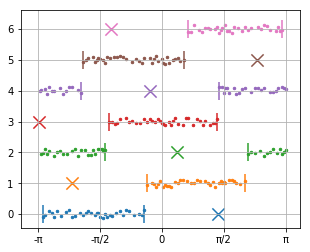

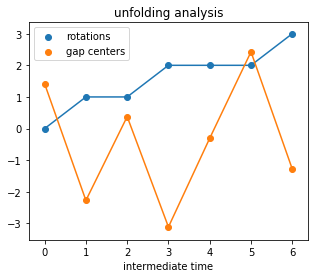

In [85]:
small_figure()
rotations, gap_centers = ana_rot(I,Q,itime,plot=True)

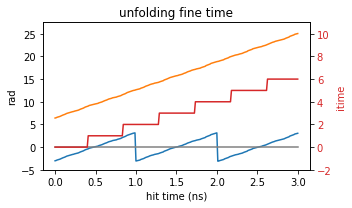

In [139]:
phi = np.arctan2(Q,I)

def unfold(phi,itime,gap_centers,rotations):
    if phi >= gap_centers[int(itime)]:
        return phi + rotations[int(itime)]*2*np.pi + np.pi
    else:
        return phi + (rotations[int(itime)]+1)*2*np.pi + np.pi

theta = np.zeros(len(phi))
for i in range(len(phi)):
    theta[i] = unfold(phi[i],itime[i],gap_centers,rotations)
    

import matplotlib.pyplot as plt
import numpy as np


# Erstellen Sie die Figur und die Achse
fig, ax1 = plt.subplots(1, 1, figsize=(5, 3))

# Plot der ersten y-Achse
ax1.plot(hit_time*1e9, phi, color=colors[0], label='phi')
ax1.plot(hit_time*1e9, theta, color=colors[1], label='theta')
ax1.set_ylabel('rad', color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.set_xlabel('hit time (ns)')
ax1.plot(hit_time*1e9,hit_time*0,color="grey")
ax1.set_ylim(-5,27.5)

# Erstellen Sie eine zweite y-Achse

my_color=colors[3]
ax2 = ax1.twinx()
ax2.plot(hit_time*1e9, itime, color=my_color, label='itime')
ax2.set_ylabel('itime', color=my_color)
ax2.set_ylim(-2,11)
ax2.tick_params(axis='y', labelcolor=my_color)

# Titel und Layout
plt.title("unfolding fine time")
fig.tight_layout()  # Optimales Layout
plt.savefig("unfold.svg")
plt.show()
    


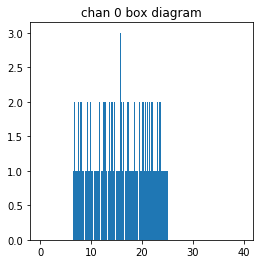

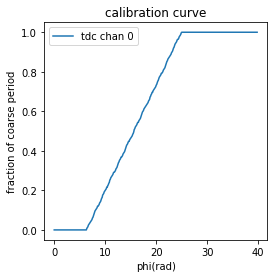

In [11]:
cphi = cont_phi_new(I,Q,itime,rotations,gap_centers)


phistep = 0.1

phirange = 40

hist_a = plt.hist(cphi,bins=np.arange(0,phirange,phistep))
plt.title("chan 0 box diagram")
plt.show()


calib_bins = hist_a[1][:-1]
plt.title("calibration curve")

curve_a = np.cumsum(hist_a[0])/np.sum(hist_a[0])

plt.plot(calib_bins,curve_a,label="tdc chan 0")
plt.legend()
plt.xlabel("phi(rad)")
plt.ylabel("fraction of coarse period")
plt.show()

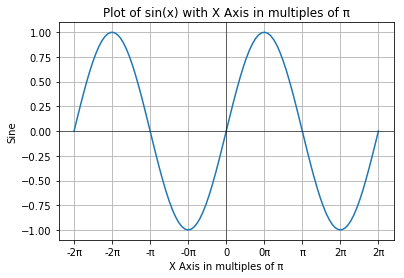

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Create sample data
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sin(x)

# Create the plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Set major ticks at multiples of π/2
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))

# Function to format ticks as multiples of π
def format_ticks(val, pos):
    if val == 0:
        return '0'
    elif val == np.pi:
        return 'π'
    elif val == -np.pi:
        return '-π'
    elif val == 2 * np.pi:
        return '2π'
    elif val == -2 * np.pi:
        return '-2π'
    else:
        return f'{val/np.pi:.0f}π'

# Apply the formatting function
ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Set x-axis and y-axis labels
ax.set_xlabel('X Axis in multiples of π')
ax.set_ylabel('Sine')

# Show the plot
plt.grid()
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.title('Plot of sin(x) with X Axis in multiples of π')
plt.show()
